In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [69]:
# Reading Dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_00)

In [70]:
# Dataset Overview
df.head(5)

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.1,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.6,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.6,1098.90,1098.90,67.50,1097.50


In [71]:
# number of rows and columns
df.shape

(10000, 7)

In [72]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    10000 non-null  object 
 1   open    10000 non-null  float64
 2   high    10000 non-null  float64
 3   low     10000 non-null  float64
 4   close   10000 non-null  float64
 5   rsi14   10000 non-null  float64
 6   sma14   10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [73]:
# checking the number of missing values
df.isnull().sum()

time     0
open     0
high     0
low      0
close    0
rsi14    0
sma14    0
dtype: int64

In [74]:
# getting the statistical measures of the data
df.describe()

,open,high,low,close,rsi14,sma14
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1108.263349,1108.794160,1107.731987,1108.263112,50.438189,1108.251465
std,24.118269,24.069989,24.173850,24.115152,11.350697,24.081460
min,1048.580000,1050.450000,1044.180000,1048.530000,9.130000,1050.850000
25%,1090.922500,1091.500000,1090.372500,1090.930000,42.790000,1090.830000
50%,1109.365000,1109.850000,1108.965000,1109.350000,50.400000,1109.480000
75%,1128.000000,1128.500000,1127.380000,1127.985000,58.160000,1128.117500
max,1160.250000,1161.880000,1158.950000,1160.330000,91.980000,1158.230000


In [75]:
# Checking Duplicates
df.duplicated().sum()

0

In [76]:
# Checking Missing Values
df.isnull().sum().sum()

0

In [77]:
# Preprocess the data
df = df.dropna()  # Handle missing values

In [78]:
df['time'] = pd.to_datetime(df['time'])
df.sort_values(by='time', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.index = df['time']

In [79]:
# df.drop(['time'], axis=1, inplace=True)
# NumCols = df.columns.drop(['Date'])
# df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
# df[NumCols] = df[NumCols].astype('float64')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2010-01-03 18:00:00 to 2010-02-22 19:30:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    10000 non-null  datetime64[ns]
 1   open    10000 non-null  float64       
 2   high    10000 non-null  float64       
 3   low     10000 non-null  float64       
 4   close   10000 non-null  float64       
 5   rsi14   10000 non-null  float64       
 6   sma14   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 625.0 KB


,time,open,high,low,close,rsi14,sma14
time,,,,,,,
2010-01-03 18:00:00,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
2010-01-03 18:05:00,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2010-01-03 18:10:00,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
2010-01-03 18:15:00,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
2010-01-03 18:20:00,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
2010-02-22 19:10:00,2010-02-22 19:10:00,1115.58,1115.70,1115.13,1115.38,65.11,1113.17
2010-02-22 19:15:00,2010-02-22 19:15:00,1115.35,1115.35,1113.78,1114.38,55.44,1113.27
2010-02-22 19:20:00,2010-02-22 19:20:00,1114.40,1114.88,1114.28,1114.45,55.93,1113.43


In [80]:
df_cp = df.copy()
df = df.drop(columns=['rsi14', 'sma14', 'time'], axis=1)

In [81]:
correlation = df.corr()

<Axes: >

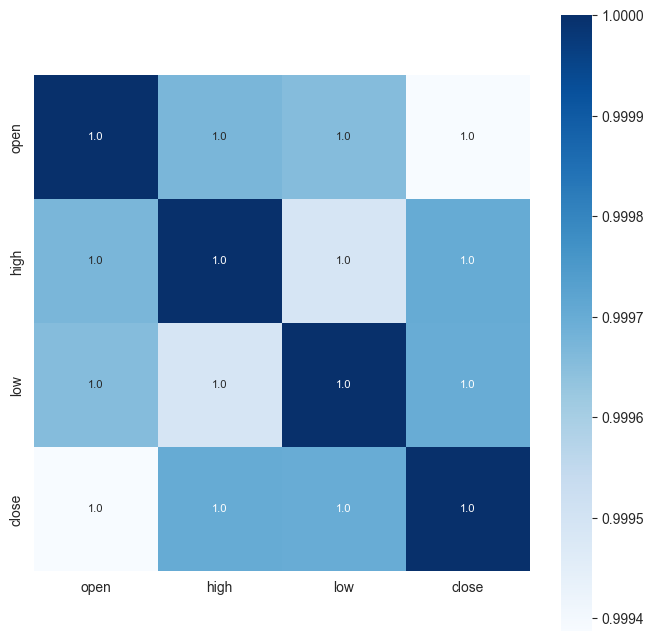

In [82]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)

In [1]:
# correlation values of GLD
print(correlation['close'])

NameError: name 'correlation' is not defined

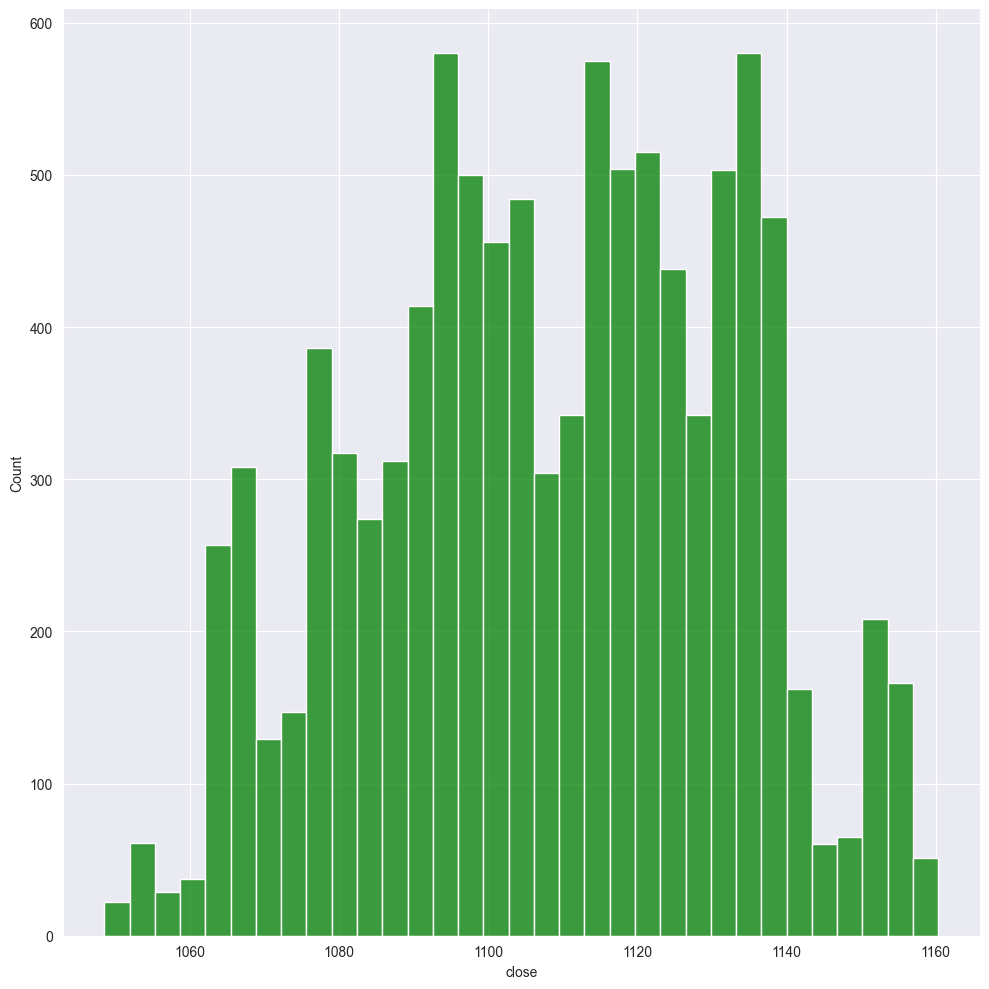

In [84]:
# checking the distribution of the GLD Price
sns.displot(
    df['close'],
    color='green',
    height=10,
)

In [85]:
X = df.drop(['close'], axis=1)
Y = df['close']

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [87]:
X_train

,open,high,low
time,,,
2010-02-16 17:15:00,1118.73,1118.73,1118.33
2010-01-11 06:00:00,1157.78,1158.40,1157.68
2010-02-11 23:25:00,1089.85,1090.05,1089.70
2010-02-10 15:45:00,1070.23,1071.73,1070.15
2010-02-10 16:55:00,1071.75,1071.93,1071.68
...,...,...,...
2010-01-07 15:20:00,1132.90,1133.23,1132.15
2010-01-14 16:35:00,1142.68,1142.90,1142.05
2010-02-04 14:30:00,1062.58,1063.78,1062.43


In [88]:
X_test

,open,high,low
time,,,
2010-02-11 01:20:00,1077.75,1079.13,1077.75
2010-01-19 10:15:00,1133.90,1134.95,1133.83
2010-01-12 13:40:00,1129.60,1130.18,1129.05
2010-01-25 18:30:00,1099.40,1099.63,1099.33
2010-01-27 04:35:00,1094.93,1095.43,1094.78
...,...,...,...
2010-02-17 11:55:00,1115.03,1115.18,1114.25
2010-02-15 18:35:00,1099.28,1099.93,1099.23
2010-01-29 03:55:00,1083.73,1084.58,1083.50


In [89]:
Y_train

time
2010-02-16 17:15:00    1118.70
2010-01-11 06:00:00    1157.83
2010-02-11 23:25:00    1089.85
2010-02-10 15:45:00    1071.70
2010-02-10 16:55:00    1071.83
                        ...   
2010-01-07 15:20:00    1132.23
2010-01-14 16:35:00    1142.25
2010-02-04 14:30:00    1063.73
2010-01-14 22:15:00    1139.30
2010-02-09 03:10:00    1069.88
Name: close, Length: 8000, dtype: float64

In [90]:
Y_test

time
2010-02-11 01:20:00    1079.08
2010-01-19 10:15:00    1134.03
2010-01-12 13:40:00    1129.33
2010-01-25 18:30:00    1099.58
2010-01-27 04:35:00    1095.13
                        ...   
2010-02-17 11:55:00    1114.48
2010-02-15 18:35:00    1099.73
2010-01-29 03:55:00    1084.18
2010-01-28 02:30:00    1088.42
2010-01-18 08:10:00    1134.35
Name: close, Length: 2000, dtype: float64

In [91]:
regressor = RandomForestRegressor(n_estimators=100)

In [92]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [93]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [136]:
X_test

,open,high,low
time,,,
2010-02-11 01:20:00,1077.75,1079.13,1077.75
2010-01-19 10:15:00,1133.90,1134.95,1133.83
2010-01-12 13:40:00,1129.60,1130.18,1129.05
2010-01-25 18:30:00,1099.40,1099.63,1099.33
2010-01-27 04:35:00,1094.93,1095.43,1094.78
...,...,...,...
2010-02-17 11:55:00,1115.03,1115.18,1114.25
2010-02-15 18:35:00,1099.28,1099.93,1099.23
2010-01-29 03:55:00,1083.73,1084.58,1083.50


In [135]:
test_data_prediction

array([1078.6932, 1134.4488, 1129.66  , ..., 1083.9104, 1088.9172,
       1134.2715])

In [95]:
test_data_prediction

array([1078.6932, 1134.4488, 1129.66  , ..., 1083.9104, 1088.9172,
       1134.2715])

In [96]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9996539605541479


In [97]:
Y_test = list(Y_test)
len(Y_test)

2000

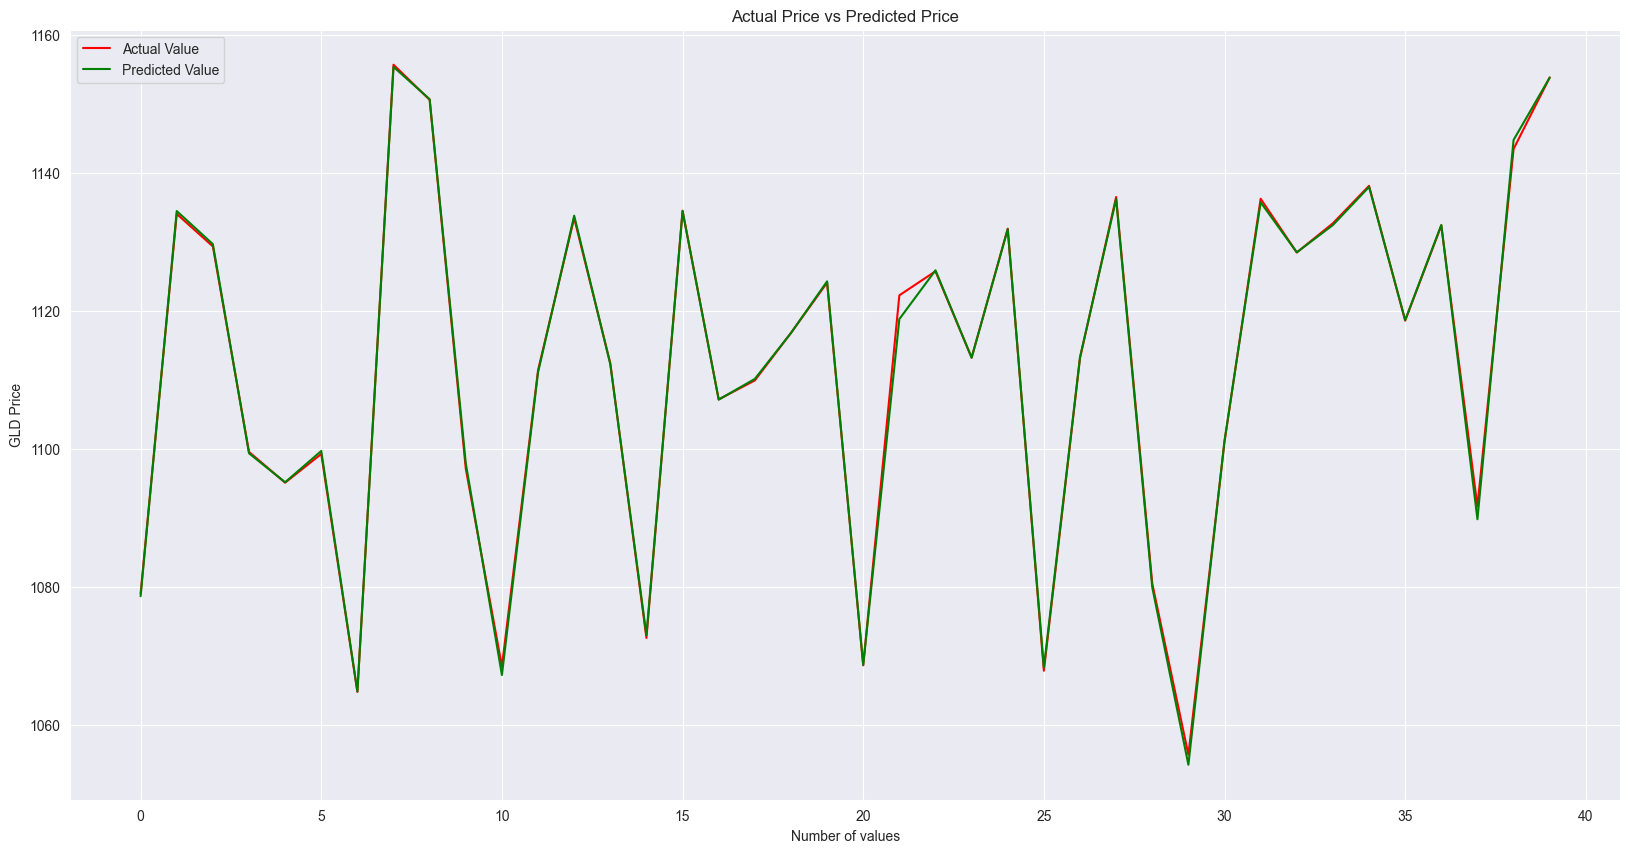

In [98]:
plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))
plt.plot(
    Y_test[:40],
    color='red',
    label='Actual Value',
    # lw=5,
)

plt.plot(
    test_data_prediction[:40],
    color='green',
    label='Predicted Value'
)

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

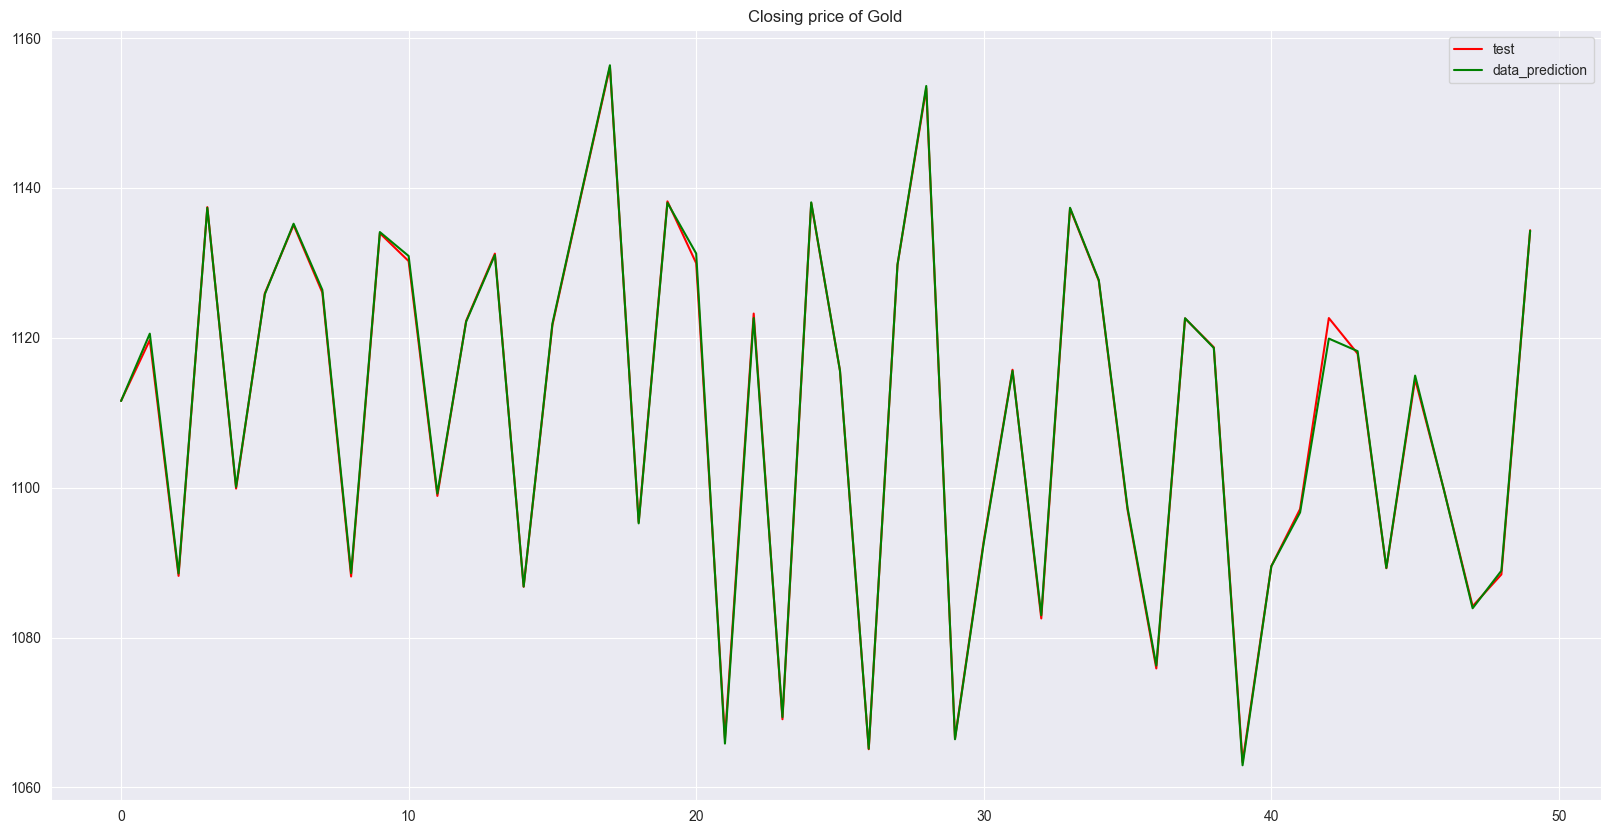

In [133]:
plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))

sns.lineplot(
    Y_test[1950:2000],
    label='test',
    color='red',
)

sns.lineplot(
    test_data_prediction[1950:2000],
    label='data_prediction',
    color='green'
)

plt.title('Closing price of Gold')
plt.show()
